In [1]:
import os

import torch
import torchvision.transforms as tt
from torchvision.datasets import ImageFolder

import matplotlib.pyplot as plt

import numpy as np

from resnet_model import *

## Initialise Data

In [2]:
resize_shape = (156, 156)

data_dir = '/home/selimon/Desktop/AI/wdwyl_ros1/src/perception/brand_classification/data/testing_new'
print(os.listdir(data_dir))

stats = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))

valid_tfms = tt.Compose([
    tt.Resize(resize_shape),
    tt.ToTensor(), 
    tt.Normalize(*stats)
])

# Load dataset & apply transformation
test_ds = ImageFolder(data_dir, valid_tfms)

['4_pine', 'crown', 'great_northern', 'heineken']


In [3]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        print('cuda')
        return torch.device('cuda')
    else:
        print('cpu')
        return torch.device('cpu')
    
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)


def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Apply softmax to get probabilities
    probs = F.softmax(yb, dim=1)
    # Retrieve the class labels
    classes = test_ds.classes
    # Print probabilities for each class
    for i, prob in enumerate(probs[0]):
        print(f'{classes[i]}: {prob.item():.4f}')
    # Pick index with highest probability as predicted class
    _, preds  = torch.max(probs, dim=1)
    # Retrieve the class label
    return test_ds.classes[preds[0].item()]

## Initialise Model

In [4]:
device = get_default_device()

# Load the model from a file and move it to the device
model = ResNetPretrained(4).to(device)
model.load_state_dict(torch.load('resnet_model.pth', map_location=device))
model.eval()  # Set the model to evaluation mode

cuda


/home/selimon/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/selimon/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNetPretrained(
  (resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
  

## Run Model

### Testing 1 image (to calculate time taken to classify)

In [5]:
# img, label = test_ds[0]

# import time
# start_time = time.time()


# # Make a prediction for the image using the model
# predicted_class = predict_image(img, model)

    
# end_time = time.time()
# execution_time = end_time - start_time
# print(f"Execution time: {execution_time} seconds")

4_pine: 0.9999
crown: 0.0000
great_northern: 0.0001
heineken: 0.0000
Execution time: 0.383136510848999 seconds


### Testing with Individual Images

4_pine: 0.9999
crown: 0.0000
great_northern: 0.0001
heineken: 0.0000
4_pine: 1.0000
crown: 0.0000
great_northern: 0.0000
heineken: 0.0000
4_pine: 1.0000
crown: 0.0000
great_northern: 0.0000
heineken: 0.0000
4_pine: 1.0000
crown: 0.0000
great_northern: 0.0000
heineken: 0.0000
4_pine: 1.0000
crown: 0.0000
great_northern: 0.0000
heineken: 0.0000
4_pine: 1.0000
crown: 0.0000
great_northern: 0.0000
heineken: 0.0000
4_pine: 1.0000
crown: 0.0000
great_northern: 0.0000
heineken: 0.0000
4_pine: 1.0000
crown: 0.0000
great_northern: 0.0000
heineken: 0.0000
4_pine: 0.9974
crown: 0.0002
great_northern: 0.0024
heineken: 0.0000
4_pine: 1.0000
crown: 0.0000
great_northern: 0.0000
heineken: 0.0000
4_pine: 1.0000
crown: 0.0000
great_northern: 0.0000
heineken: 0.0000
4_pine: 1.0000
crown: 0.0000
great_northern: 0.0000
heineken: 0.0000
4_pine: 0.0438
crown: 0.0883
great_northern: 0.8676
heineken: 0.0003


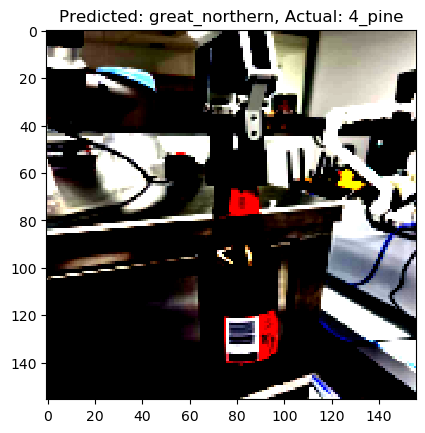

4_pine: 0.0000
crown: 0.9957
great_northern: 0.0043
heineken: 0.0000


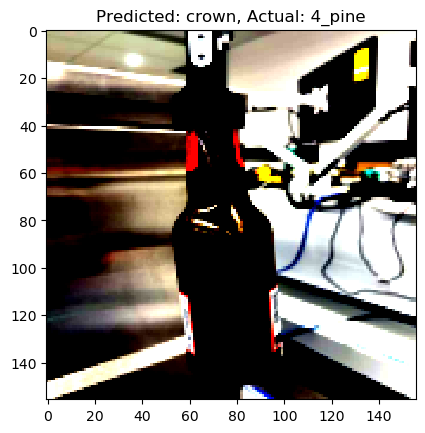

4_pine: 0.9832
crown: 0.0167
great_northern: 0.0000
heineken: 0.0000
4_pine: 0.9722
crown: 0.0191
great_northern: 0.0087
heineken: 0.0000
4_pine: 1.0000
crown: 0.0000
great_northern: 0.0000
heineken: 0.0000
4_pine: 1.0000
crown: 0.0000
great_northern: 0.0000
heineken: 0.0000
4_pine: 1.0000
crown: 0.0000
great_northern: 0.0000
heineken: 0.0000
4_pine: 0.3205
crown: 0.6788
great_northern: 0.0007
heineken: 0.0000


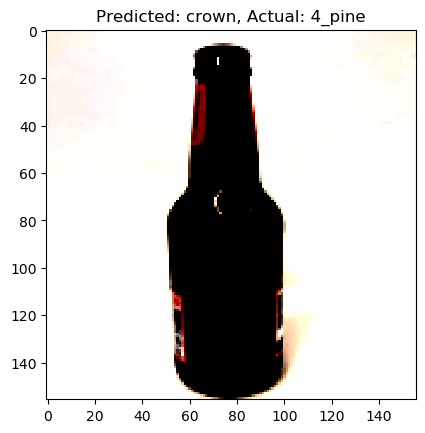

4_pine: 0.9941
crown: 0.0000
great_northern: 0.0059
heineken: 0.0000
4_pine: 1.0000
crown: 0.0000
great_northern: 0.0000
heineken: 0.0000
4_pine: 1.0000
crown: 0.0000
great_northern: 0.0000
heineken: 0.0000
4_pine: 0.9968
crown: 0.0000
great_northern: 0.0031
heineken: 0.0000
4_pine: 1.0000
crown: 0.0000
great_northern: 0.0000
heineken: 0.0000
4_pine: 1.0000
crown: 0.0000
great_northern: 0.0000
heineken: 0.0000
4_pine: 0.9999
crown: 0.0001
great_northern: 0.0001
heineken: 0.0000
4_pine: 1.0000
crown: 0.0000
great_northern: 0.0000
heineken: 0.0000
4_pine: 1.0000
crown: 0.0000
great_northern: 0.0000
heineken: 0.0000
4_pine: 0.9999
crown: 0.0000
great_northern: 0.0001
heineken: 0.0000
4_pine: 0.9146
crown: 0.0828
great_northern: 0.0015
heineken: 0.0011
4_pine: 1.0000
crown: 0.0000
great_northern: 0.0000
heineken: 0.0000
4_pine: 1.0000
crown: 0.0000
great_northern: 0.0000
heineken: 0.0000
4_pine: 1.0000
crown: 0.0000
great_northern: 0.0000
heineken: 0.0000
4_pine: 1.0000
crown: 0.0000
great

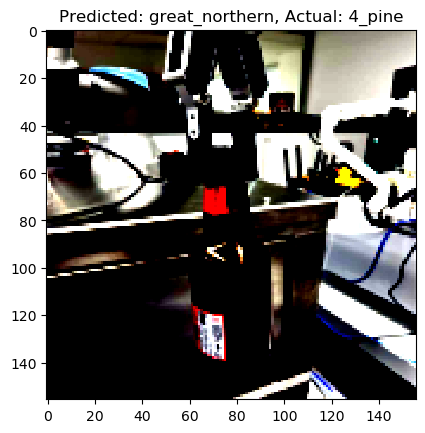

4_pine: 1.0000
crown: 0.0000
great_northern: 0.0000
heineken: 0.0000
4_pine: 1.0000
crown: 0.0000
great_northern: 0.0000
heineken: 0.0000
4_pine: 1.0000
crown: 0.0000
great_northern: 0.0000
heineken: 0.0000
4_pine: 1.0000
crown: 0.0000
great_northern: 0.0000
heineken: 0.0000
4_pine: 1.0000
crown: 0.0000
great_northern: 0.0000
heineken: 0.0000
4_pine: 1.0000
crown: 0.0000
great_northern: 0.0000
heineken: 0.0000
4_pine: 1.0000
crown: 0.0000
great_northern: 0.0000
heineken: 0.0000
4_pine: 1.0000
crown: 0.0000
great_northern: 0.0000
heineken: 0.0000
4_pine: 1.0000
crown: 0.0000
great_northern: 0.0000
heineken: 0.0000
4_pine: 1.0000
crown: 0.0000
great_northern: 0.0000
heineken: 0.0000
4_pine: 0.9990
crown: 0.0000
great_northern: 0.0010
heineken: 0.0000
4_pine: 1.0000
crown: 0.0000
great_northern: 0.0000
heineken: 0.0000
4_pine: 1.0000
crown: 0.0000
great_northern: 0.0000
heineken: 0.0000
4_pine: 1.0000
crown: 0.0000
great_northern: 0.0000
heineken: 0.0000
4_pine: 1.0000
crown: 0.0000
great

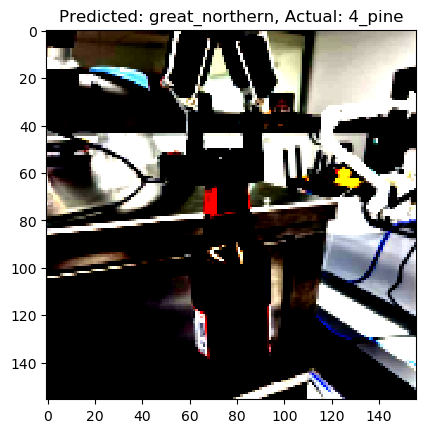

4_pine: 1.0000
crown: 0.0000
great_northern: 0.0000
heineken: 0.0000
4_pine: 1.0000
crown: 0.0000
great_northern: 0.0000
heineken: 0.0000
4_pine: 1.0000
crown: 0.0000
great_northern: 0.0000
heineken: 0.0000
4_pine: 1.0000
crown: 0.0000
great_northern: 0.0000
heineken: 0.0000
4_pine: 1.0000
crown: 0.0000
great_northern: 0.0000
heineken: 0.0000
4_pine: 1.0000
crown: 0.0000
great_northern: 0.0000
heineken: 0.0000
4_pine: 1.0000
crown: 0.0000
great_northern: 0.0000
heineken: 0.0000
4_pine: 1.0000
crown: 0.0000
great_northern: 0.0000
heineken: 0.0000
4_pine: 1.0000
crown: 0.0000
great_northern: 0.0000
heineken: 0.0000
4_pine: 1.0000
crown: 0.0000
great_northern: 0.0000
heineken: 0.0000
4_pine: 0.9883
crown: 0.0117
great_northern: 0.0000
heineken: 0.0000
4_pine: 1.0000
crown: 0.0000
great_northern: 0.0000
heineken: 0.0000
4_pine: 0.9770
crown: 0.0230
great_northern: 0.0000
heineken: 0.0000
4_pine: 1.0000
crown: 0.0000
great_northern: 0.0000
heineken: 0.0000
4_pine: 1.0000
crown: 0.0000
great

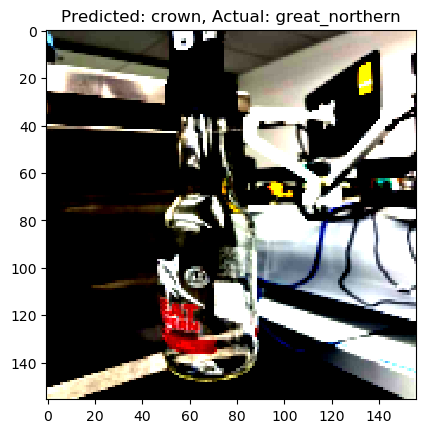

4_pine: 0.0000
crown: 0.0000
great_northern: 0.9938
heineken: 0.0061
4_pine: 0.0000
crown: 0.0000
great_northern: 1.0000
heineken: 0.0000
4_pine: 0.0000
crown: 0.0011
great_northern: 0.9989
heineken: 0.0000
4_pine: 0.0000
crown: 0.9993
great_northern: 0.0007
heineken: 0.0000


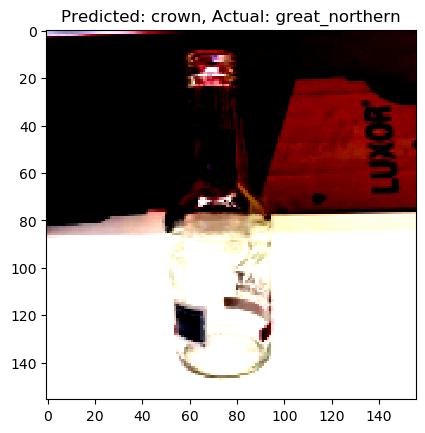

4_pine: 0.0000
crown: 0.0000
great_northern: 1.0000
heineken: 0.0000
4_pine: 0.0000
crown: 0.0001
great_northern: 0.9999
heineken: 0.0000
4_pine: 0.0000
crown: 0.0000
great_northern: 1.0000
heineken: 0.0000
4_pine: 0.0000
crown: 0.0187
great_northern: 0.9812
heineken: 0.0001
4_pine: 0.0000
crown: 0.0002
great_northern: 0.9997
heineken: 0.0000
4_pine: 0.0000
crown: 0.6735
great_northern: 0.3265
heineken: 0.0000


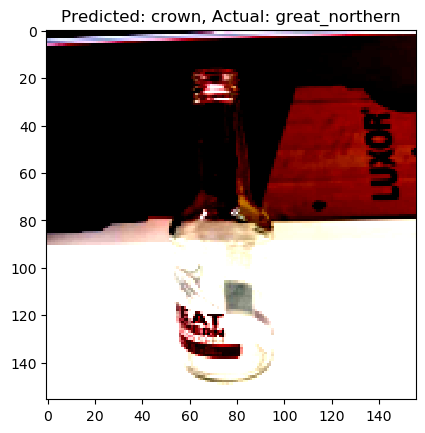

4_pine: 0.0000
crown: 0.9998
great_northern: 0.0002
heineken: 0.0000


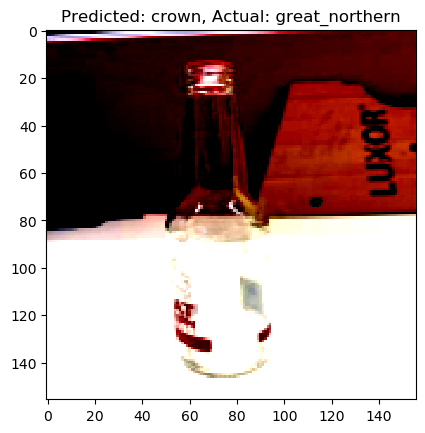

4_pine: 0.0000
crown: 0.0000
great_northern: 1.0000
heineken: 0.0000
4_pine: 0.0000
crown: 0.9998
great_northern: 0.0002
heineken: 0.0000


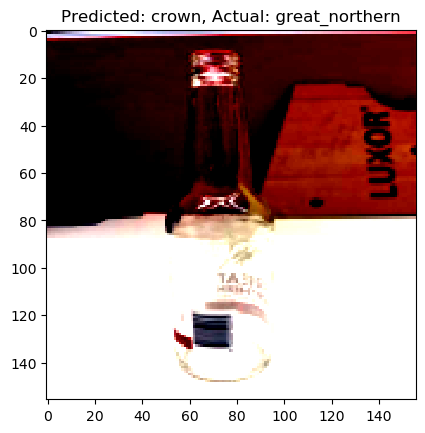

4_pine: 0.0000
crown: 0.1556
great_northern: 0.8444
heineken: 0.0000
4_pine: 0.0000
crown: 0.0002
great_northern: 0.9998
heineken: 0.0000
4_pine: 0.0000
crown: 0.9892
great_northern: 0.0108
heineken: 0.0000


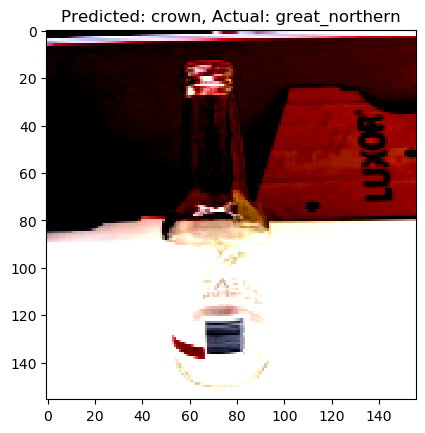

4_pine: 0.0000
crown: 0.0000
great_northern: 1.0000
heineken: 0.0000
4_pine: 0.0000
crown: 0.0000
great_northern: 1.0000
heineken: 0.0000
4_pine: 0.0000
crown: 0.0025
great_northern: 0.9813
heineken: 0.0162
4_pine: 0.0000
crown: 0.0000
great_northern: 0.9999
heineken: 0.0000
4_pine: 0.0000
crown: 0.0000
great_northern: 1.0000
heineken: 0.0000
4_pine: 0.0000
crown: 0.0002
great_northern: 0.9998
heineken: 0.0000
4_pine: 0.0000
crown: 0.0000
great_northern: 1.0000
heineken: 0.0000
4_pine: 0.0000
crown: 0.1177
great_northern: 0.8822
heineken: 0.0000
4_pine: 0.0000
crown: 0.0002
great_northern: 0.9997
heineken: 0.0000
4_pine: 0.0000
crown: 0.0001
great_northern: 0.9992
heineken: 0.0007
4_pine: 0.0000
crown: 0.0616
great_northern: 0.9384
heineken: 0.0000
4_pine: 0.0000
crown: 0.0139
great_northern: 0.9860
heineken: 0.0001
4_pine: 0.0000
crown: 0.0000
great_northern: 1.0000
heineken: 0.0000
4_pine: 0.0000
crown: 0.0000
great_northern: 1.0000
heineken: 0.0000
4_pine: 0.0000
crown: 0.0000
great

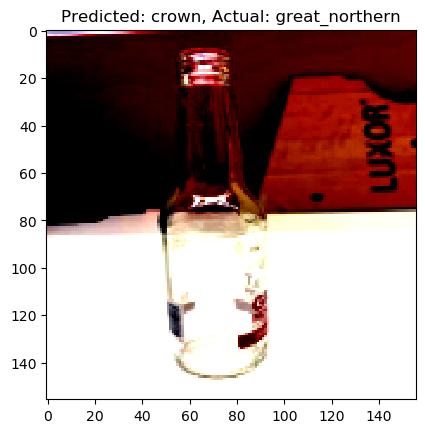

4_pine: 0.0000
crown: 0.1048
great_northern: 0.8931
heineken: 0.0021
4_pine: 0.0000
crown: 0.8098
great_northern: 0.1901
heineken: 0.0001


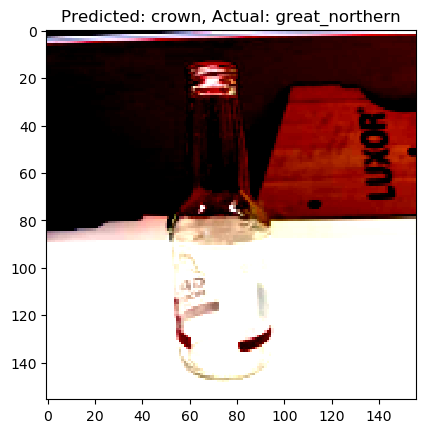

4_pine: 0.0000
crown: 0.0000
great_northern: 1.0000
heineken: 0.0000
4_pine: 0.0000
crown: 0.0000
great_northern: 1.0000
heineken: 0.0000
4_pine: 0.0000
crown: 0.0000
great_northern: 1.0000
heineken: 0.0000
4_pine: 0.0000
crown: 0.0008
great_northern: 0.9992
heineken: 0.0000
4_pine: 0.0000
crown: 0.9877
great_northern: 0.0123
heineken: 0.0000


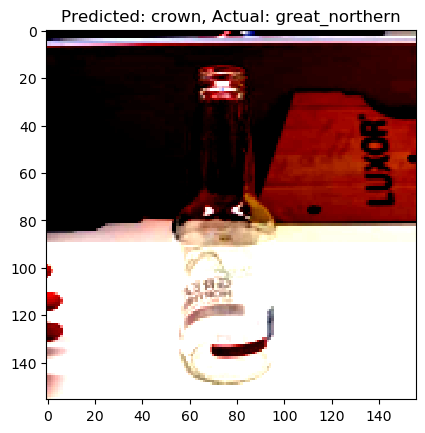

4_pine: 0.0000
crown: 0.0011
great_northern: 0.9989
heineken: 0.0000
4_pine: 0.0030
crown: 0.0004
great_northern: 0.9966
heineken: 0.0000
4_pine: 0.0000
crown: 0.0426
great_northern: 0.9531
heineken: 0.0043
4_pine: 0.0000
crown: 0.9995
great_northern: 0.0005
heineken: 0.0000


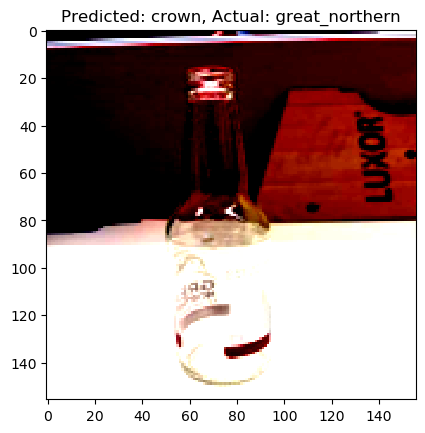

4_pine: 0.0000
crown: 0.9993
great_northern: 0.0007
heineken: 0.0000


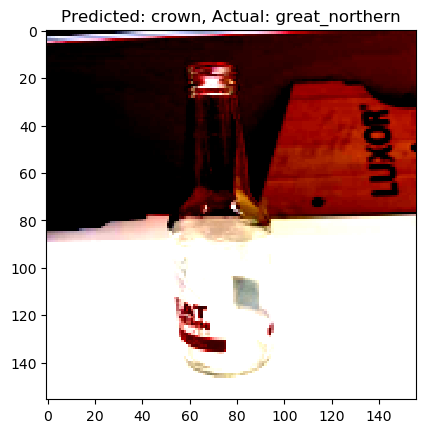

4_pine: 0.0000
crown: 0.0000
great_northern: 0.9998
heineken: 0.0002
4_pine: 0.0000
crown: 0.0000
great_northern: 0.9999
heineken: 0.0000
4_pine: 0.0000
crown: 0.0000
great_northern: 1.0000
heineken: 0.0000
4_pine: 0.0000
crown: 0.9974
great_northern: 0.0026
heineken: 0.0000


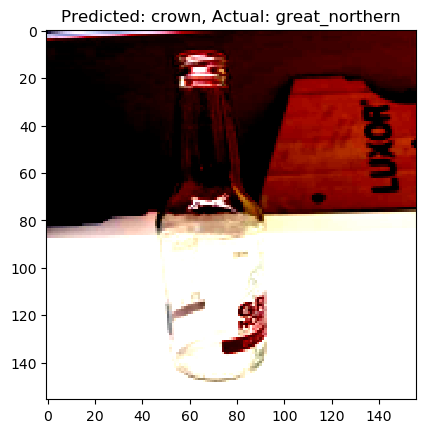

4_pine: 0.0000
crown: 0.7426
great_northern: 0.2494
heineken: 0.0080


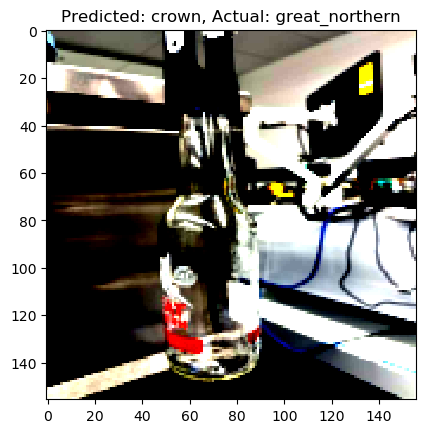

4_pine: 0.0000
crown: 0.0000
great_northern: 1.0000
heineken: 0.0000
4_pine: 0.0000
crown: 0.9996
great_northern: 0.0004
heineken: 0.0000


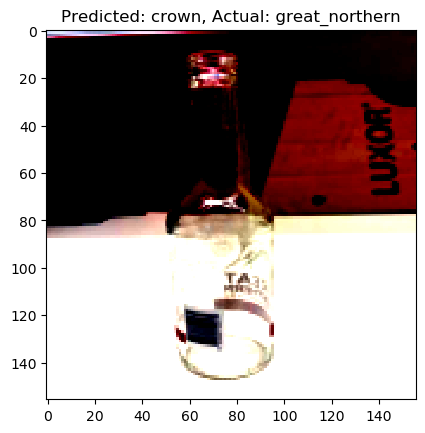

4_pine: 0.0000
crown: 0.9981
great_northern: 0.0019
heineken: 0.0000


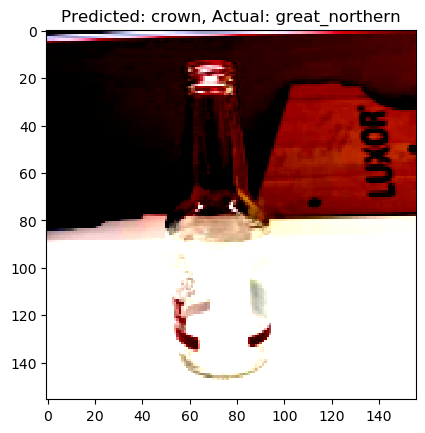

4_pine: 0.0000
crown: 0.0035
great_northern: 0.9965
heineken: 0.0000
4_pine: 0.0000
crown: 0.6728
great_northern: 0.3272
heineken: 0.0000


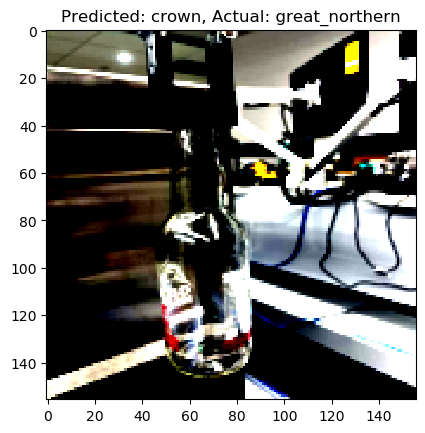

4_pine: 0.0000
crown: 0.1708
great_northern: 0.8292
heineken: 0.0000
4_pine: 0.0000
crown: 0.0000
great_northern: 1.0000
heineken: 0.0000
4_pine: 0.0000
crown: 0.0000
great_northern: 1.0000
heineken: 0.0000
4_pine: 0.0000
crown: 0.0023
great_northern: 0.9977
heineken: 0.0000
4_pine: 0.0000
crown: 0.0014
great_northern: 0.9986
heineken: 0.0000
4_pine: 0.0000
crown: 0.0000
great_northern: 1.0000
heineken: 0.0000
4_pine: 0.0000
crown: 0.5034
great_northern: 0.4964
heineken: 0.0001


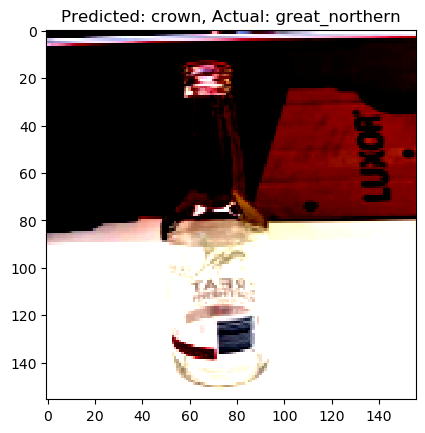

4_pine: 0.0000
crown: 0.0357
great_northern: 0.8487
heineken: 0.1156
4_pine: 0.0000
crown: 0.0007
great_northern: 0.9993
heineken: 0.0000
4_pine: 0.0000
crown: 0.8116
great_northern: 0.1884
heineken: 0.0000


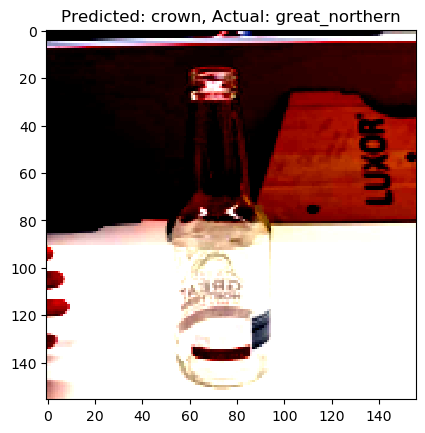

4_pine: 0.0000
crown: 0.0000
great_northern: 1.0000
heineken: 0.0000
4_pine: 0.0000
crown: 0.0300
great_northern: 0.9700
heineken: 0.0000
4_pine: 0.0000
crown: 0.0009
great_northern: 0.9991
heineken: 0.0000
4_pine: 0.0000
crown: 0.0000
great_northern: 1.0000
heineken: 0.0000
4_pine: 0.0000
crown: 0.0000
great_northern: 0.0000
heineken: 1.0000
4_pine: 0.0005
crown: 0.0012
great_northern: 0.0000
heineken: 0.9983
4_pine: 0.0000
crown: 0.0000
great_northern: 0.0000
heineken: 1.0000
4_pine: 0.0000
crown: 0.0000
great_northern: 0.0000
heineken: 1.0000
4_pine: 0.0008
crown: 0.0000
great_northern: 0.0000
heineken: 0.9992
4_pine: 0.0000
crown: 0.0000
great_northern: 0.0000
heineken: 1.0000
4_pine: 0.0000
crown: 0.0000
great_northern: 0.0000
heineken: 1.0000
4_pine: 0.0000
crown: 0.0000
great_northern: 0.0000
heineken: 1.0000
4_pine: 0.0000
crown: 0.0000
great_northern: 0.0000
heineken: 1.0000
4_pine: 0.0000
crown: 0.0000
great_northern: 0.0000
heineken: 1.0000
4_pine: 0.0000
crown: 0.0000
great

In [16]:
correct_predictions = 0
total_images = len(test_ds)

for i in range(total_images):
    # Get the image and its label from the dataset
    img, label = test_ds[i]
    
    # Make a prediction for the image using the model
    predicted_class = predict_image(img, model)
    
    # Check if the prediction is correct
    if predicted_class == test_ds.classes[label]:
        correct_predictions += 1
        
    else:
        # Visualize the image
        plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
        plt.title(f"Predicted: {predicted_class}, Actual: {test_ds.classes[label]}")
        plt.show()

## Accuracy Score

In [17]:
accuracy = correct_predictions / total_images
print(f"Accuracy on the test dataset: {accuracy:.2%}")

Accuracy on the test dataset: 92.81%
